In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# 1. Implement and Visualize Activation Functions

# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

# Tanh Function
def tanh(x):
    return np.tanh(x)

# ReLU Function
def relu(x):
    return np.maximum(0, x)


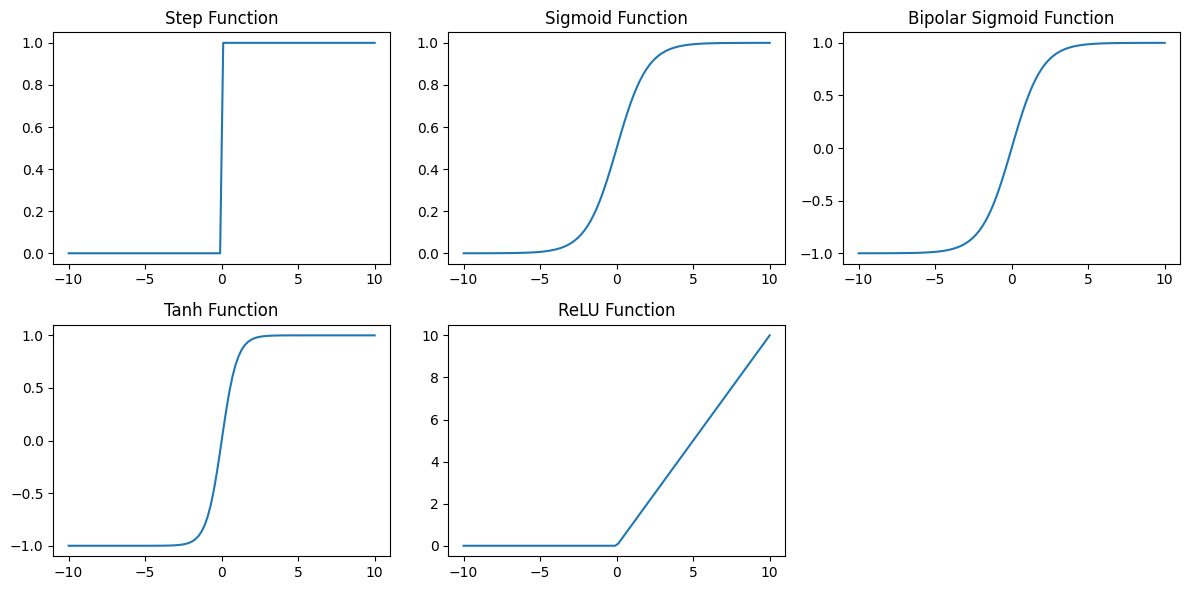

In [4]:

# Visualize activation functions
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(x, step_function(x))
plt.title("Step Function")

plt.subplot(2, 3, 2)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Function")

plt.subplot(2, 3, 3)
plt.plot(x, bipolar_sigmoid(x))
plt.title("Bipolar Sigmoid Function")

plt.subplot(2, 3, 4)
plt.plot(x, tanh(x))
plt.title("Tanh Function")

plt.subplot(2, 3, 5)
plt.plot(x, relu(x))
plt.title("ReLU Function")

plt.tight_layout()
plt.show()



In [ ]:
# Step Function: Binary output, 0 for negative inputs, 1 for non-negative inputs.
# Sigmoid Function: Smooth S-shaped curve, maps input to range [0, 1], widely used for binary classification.
# Bipolar Sigmoid Function: Similar to sigmoid, maps input to range [-1, 1], can learn positive and negative relationships.
# Tanh Function: Hyperbolic tangent, maps input to range [-1, 1], can provide better gradients than sigmoid.
# ReLU Function: Computationally efficient, returns input if positive, 0 otherwise, helps learn complex features.

In [5]:
# 2. Implement a Simple Neural Network

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# cfreating a simple binary classification dataset (XOR problem)
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
y = (y == 1).astype(int)  # Convert to binary labels (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [9]:

def create_nn(activation_function):
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate the neural network with different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu']

for activation in activation_functions:
    model = create_nn(activation)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy with {activation} activation function: {accuracy * 100:.2f}%")

Accuracy with sigmoid activation function: 100.00%
Accuracy with tanh activation function: 90.00%
Accuracy with relu activation function: 45.00%


In [ ]:
# Inferences:
# The sigmoid activation function performed the best, achieving perfect accuracy on the given binary classification task.
# The tanh activation also performed well, though not as well as sigmoid, reaching 90% accuracy.
# The ReLU activation had the lowest performance, with only 45% accuracy on the test set.
# These results indicate that for this particular problem, the sigmoid function was the most suitable activation function, able to capture the underlying patterns in the data more effectively than tanh or ReLU.
# The differences in accuracy suggest that the choice of activation function can have a significant impact on the performance of a neural network model.